In [12]:
import pandas as pd
import json
from pandas.io.json import json_normalize  # package for flattening json in pandas df
import matplotlib.pyplot as plt
import pandas as pd
from dateutil.parser import parse


In [2]:
import dask.dataframe as dd

# Read from a csv file into a dask dataframe
df = dd.read_csv('yellow_taxi_data.csv')

# Check how many rows and columns this dataframe has
print("number of rows:", len(df.index.compute()))
print("number of columns:", len(df.columns))


number of rows: 24648499
number of columns: 7


In [4]:
sample_statement="The {} {} rows are: "
print(sample_statement.format('first',50))
df.head(50)

The first 50 rows are: 


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,congestion_surcharge,real_total_amount
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.20,238,239,2.5,9.80
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.20,239,238,2.5,10.80
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,0.60,238,238,2.5,9.80
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,0.80,238,151,0.0,6.80
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,0.00,193,193,0.0,4.80
5,01/01/2020 12:09:44 AM,01/01/2020 12:10:37 AM,0.03,7,193,0.0,3.80
6,01/01/2020 12:39:25 AM,01/01/2020 12:39:29 AM,0.00,193,193,0.0,3.80
7,12/18/2019 03:27:49 PM,12/18/2019 03:28:59 PM,0.00,193,193,2.5,2.81
8,12/18/2019 03:30:35 PM,12/18/2019 03:31:35 PM,0.00,193,193,2.5,6.30
9,01/01/2020 12:29:01 AM,01/01/2020 12:40:28 AM,0.70,246,48,2.5,11.80


In [5]:
sample_statement="The {} {} rows are: "
print(sample_statement.format('tail',50))
df.tail(50)

The tail 50 rows are: 


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,congestion_surcharge,real_total_amount
35890,12/31/2020 10:00:03 PM,12/31/2020 10:13:29 PM,2.60,108,26,0.0,17.81
35891,12/31/2020 10:19:00 PM,12/31/2020 10:46:00 PM,16.02,241,232,0.0,49.76
35892,12/31/2020 10:29:00 PM,12/31/2020 10:38:00 PM,1.79,239,143,2.5,10.30
35893,12/31/2020 10:44:00 PM,12/31/2020 11:03:00 PM,5.30,42,18,0.0,29.75
35894,12/31/2020 10:57:00 PM,12/31/2020 11:24:00 PM,11.11,77,122,0.0,49.15
35895,12/31/2020 10:28:00 PM,12/31/2020 11:08:00 PM,15.94,25,122,0.0,58.37
35896,12/31/2020 10:12:59 PM,12/31/2020 10:12:03 PM,7.49,265,208,0.0,20.95
35897,12/31/2020 10:12:00 PM,12/31/2020 10:21:00 PM,3.28,213,47,0.0,20.83
35898,12/31/2020 10:07:27 PM,12/31/2020 10:19:21 PM,4.14,147,75,0.0,24.62
35899,12/31/2020 11:21:32 PM,12/31/2020 11:44:10 PM,0.00,180,49,0.0,23.00


In [1]:
import dask.dataframe as dd

# Read the CSV file
df = dd.read_csv('yellow_taxi_data.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Create a new column for the month
df['month'] = df['tpep_pickup_datetime'].dt.month

# Define the quarters
quarters = [(1, 3), (4, 6), (7, 9), (10, 12)]

# Loop over each quarter
for i, (start_month, end_month) in enumerate(quarters, 1):
    # Filter the dataframe by the quarter
    df_quarter = df[(df['month'] >= start_month) & (df['month'] <= end_month)]
    
    # Compute the quarter dataframe and write it to a CSV file
    df_quarter.compute().to_csv(f'yellow_taxi_data_Q{i}.csv', index=False)


In [2]:
df = dd.read_csv('yellow_taxi_data_Q1.csv')
print("Shape: ", df.shape[0].compute(), df.shape[1])  # Note: This might take some time

# Processing dates
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month

Shape:  15711620 8


In [81]:
df = dd.read_csv('yellow_taxi_data_Q2.csv')
print("Shape: ", df.shape[0].compute(), df.shape[1])  # Note: This might take some time

# Processing dates
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month

Shape:  1136035 8


In [82]:
df = dd.read_csv('yellow_taxi_data_Q3.csv')
print("Shape: ", df.shape[0].compute(), df.shape[1])  # Note: This might take some time

# Processing dates
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month

Shape:  3148604 8


In [83]:
df = dd.read_csv('yellow_taxi_data_Q4.csv')
print("Shape: ", df.shape[0].compute(), df.shape[1])  # Note: This might take some time

# Processing dates
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month

Shape:  4652240 8


In [3]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np

# total taxi trip time

# the total trip time Q1

In [12]:
import dask.dataframe as dd

# Read the CSV file
df = dd.read_csv('yellow_taxi_data_Q1.csv')

# Parse 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' into datetime objects
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Calculate the duration of each trip
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Create a new column for the month
df['month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and sum the durations
total_time_per_month = df.groupby('month')['duration'].sum().compute()

print(total_time_per_month)


month
1   70942 days 09:37:54
2   70555 days 21:47:22
3   32536 days 09:04:14
Name: duration, dtype: timedelta64[ns]


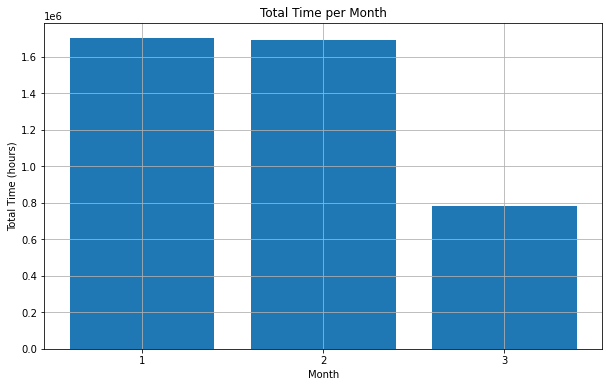

In [13]:
import matplotlib.pyplot as plt

# Convert the timedelta to hours
total_time_per_month_hours = total_time_per_month.dt.total_seconds() / 3600

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_time_per_month_hours.index, total_time_per_month_hours.values)
plt.xlabel('Month')
plt.ylabel('Total Time (hours)')
plt.title('Total Time per Month')
plt.xticks(total_time_per_month_hours.index)
plt.grid(True)
plt.show()


# the total trip time Q2

In [14]:
import dask.dataframe as dd

# Read the CSV file
df = dd.read_csv('yellow_taxi_data_Q2.csv')

# Parse 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' into datetime objects
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Calculate the duration of each trip
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Create a new column for the month
df['month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and sum the durations
total_time_per_month = df.groupby('month')['duration'].sum().compute()

print(total_time_per_month)

month
4   1866 days 07:40:33
5   3268 days 04:01:59
6   5129 days 19:14:12
Name: duration, dtype: timedelta64[ns]


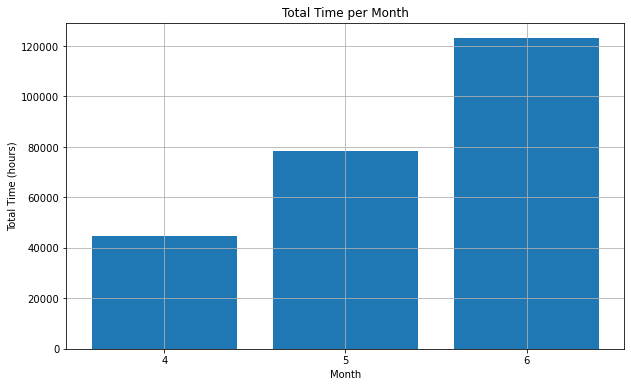

In [15]:
import matplotlib.pyplot as plt

# Convert the timedelta to hours
total_time_per_month_hours = total_time_per_month.dt.total_seconds() / 3600

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_time_per_month_hours.index, total_time_per_month_hours.values)
plt.xlabel('Month')
plt.ylabel('Total Time (hours)')
plt.title('Total Time per Month')
plt.xticks(total_time_per_month_hours.index)
plt.grid(True)
plt.show()


# the total trip time Q3

In [16]:
import dask.dataframe as dd

# Read the CSV file
df = dd.read_csv('yellow_taxi_data_Q3.csv')

# Parse 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' into datetime objects
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Calculate the duration of each trip
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Create a new column for the month
df['month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and sum the durations
total_time_per_month = df.groupby('month')['duration'].sum().compute()

print(total_time_per_month)

month
7    7788 days 13:09:50
8   10425 days 13:56:01
9   14224 days 17:00:33
Name: duration, dtype: timedelta64[ns]


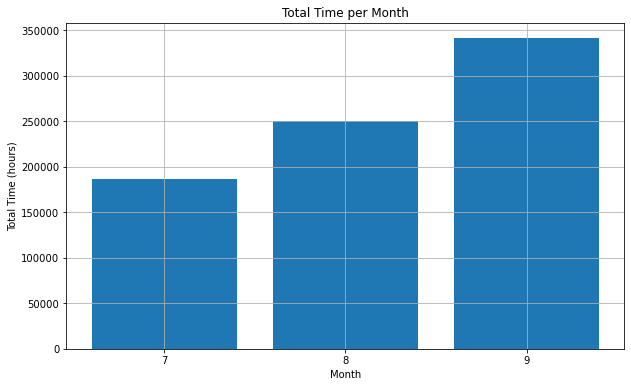

In [17]:
import matplotlib.pyplot as plt

# Convert the timedelta to hours
total_time_per_month_hours = total_time_per_month.dt.total_seconds() / 3600

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_time_per_month_hours.index, total_time_per_month_hours.values)
plt.xlabel('Month')
plt.ylabel('Total Time (hours)')
plt.title('Total Time per Month')
plt.xticks(total_time_per_month_hours.index)
plt.grid(True)
plt.show()

# the total trip time Q4

In [18]:
import dask.dataframe as dd

# Read the CSV file
df = dd.read_csv('yellow_taxi_data_Q4.csv')

# Parse 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' into datetime objects
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Calculate the duration of each trip
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Create a new column for the month
df['month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and sum the durations
total_time_per_month = df.groupby('month')['duration'].sum().compute()

print(total_time_per_month)

month
10   18006 days 16:10:46
11   15672 days 00:13:27
12   15300 days 04:21:30
Name: duration, dtype: timedelta64[ns]


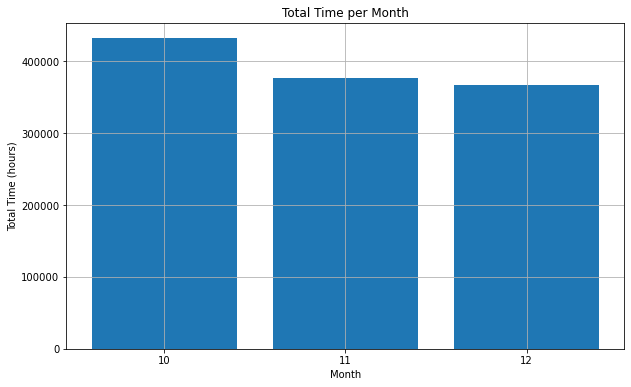

In [19]:
import matplotlib.pyplot as plt

# Convert the timedelta to hours
total_time_per_month_hours = total_time_per_month.dt.total_seconds() / 3600

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_time_per_month_hours.index, total_time_per_month_hours.values)
plt.xlabel('Month')
plt.ylabel('Total Time (hours)')
plt.title('Total Time per Month')
plt.xticks(total_time_per_month_hours.index)
plt.grid(True)
plt.show()

# total trip distance

# total trip distance Q1

In [52]:
import dask.dataframe as dd

# Read the Q1 data back into a Dask dataframe
df_q1 = dd.read_csv('yellow_taxi_data_Q1.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q1['tpep_pickup_datetime'] = dd.to_datetime(df_q1['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q1['tpep_dropoff_datetime'] = dd.to_datetime(df_q1['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q1['week'] = df_q1['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the trip distances
weekly_trip_distance_q1 = df_q1.groupby('week')['trip_distance'].sum().compute()

# Print the total trip distance per week
print(weekly_trip_distance_q1)


week
1     2748696.36
2     4247496.43
53         21.31
5     4481930.77
3     4232770.84
8     4181577.67
12     819377.15
4     4204789.45
7     4302742.81
10    4740562.63
13     216451.19
6     4344252.94
9     4673051.66
11    2932070.42
14      56018.47
Name: trip_distance, dtype: float64


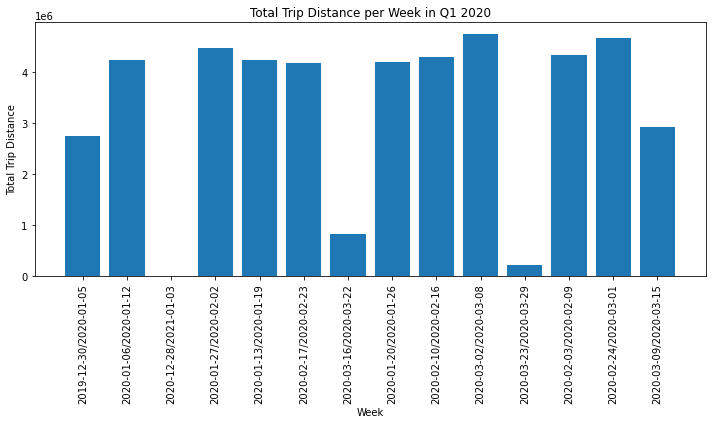

In [38]:

# Load Q1 data
df = dd.read_csv('yellow_taxi_data_Q1.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])

# Calculate the total trip distance per week
weekly_distance = df.groupby(df['tpep_pickup_datetime'].dt.to_period('W'))['trip_distance'].sum().compute()

# Filter out weeks not in Q1 of 2020
weekly_distance = weekly_distance[weekly_distance.index.quarter == 1]
weekly_distance = weekly_distance['2020']

# Convert the index to a string to fix formatting issues with matplotlib
weekly_distance.index = weekly_distance.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_distance.index, weekly_distance.values)
plt.xlabel('Week')
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance per Week in Q1 2020')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()



# total trip distance Q2

In [60]:
import dask.dataframe as dd

# Read the Q1 data back into a Dask dataframe
df_q2 = dd.read_csv('yellow_taxi_data_Q2.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q2['tpep_pickup_datetime'] = dd.to_datetime(df_q2['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q2['tpep_dropoff_datetime'] = dd.to_datetime(df_q2['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q2['week'] = df_q2['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the trip distances
weekly_trip_distance_q2 = df_q2.groupby('week')['trip_distance'].sum().compute()

# Print the total trip distance per week
print(weekly_trip_distance_q2)

week
14     118589.72
15     269471.69
16     156527.61
17     291875.34
18     516507.43
19     599144.23
20    1107020.00
21     319679.84
22     485597.94
23     458130.17
24     413715.70
25     435073.69
26     793974.12
27     155502.62
Name: trip_distance, dtype: float64


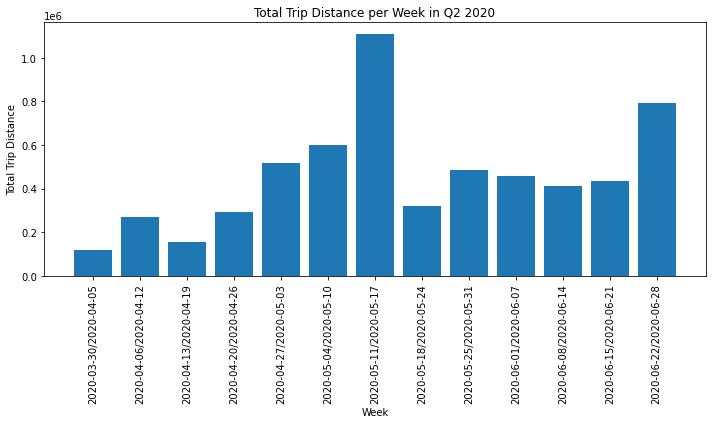

In [63]:
# Load Q2 data
df = dd.read_csv('yellow_taxi_data_Q2.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])

# Calculate the total trip distance per week
weekly_distance = df.groupby(df['tpep_pickup_datetime'].dt.to_period('W'))['trip_distance'].sum().compute()

# Filter out weeks not in Q2 of 2020
weekly_distance = weekly_distance[weekly_distance.index.quarter == 2]
weekly_distance = weekly_distance['2020']

# Convert the index to a string to fix formatting issues with matplotlib
weekly_distance.index = weekly_distance.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_distance.index, weekly_distance.values)
plt.xlabel('Week')
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance per Week in Q2 2020')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()


# total trip distance Q3

In [64]:
import dask.dataframe as dd

# Read the Q1 data back into a Dask dataframe
df_q3 = dd.read_csv('yellow_taxi_data_Q3.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q3['tpep_pickup_datetime'] = dd.to_datetime(df_q3['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q3['tpep_dropoff_datetime'] = dd.to_datetime(df_q3['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q3['week'] = df_q3['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the trip distances
weekly_trip_distance_q3 = df_q3.groupby('week')['trip_distance'].sum().compute()

# Print the total trip distance per week
print(weekly_trip_distance_q3)

week
27     385873.36
28     753185.94
29     865245.20
30     956516.40
31     645578.72
32     917558.08
35    1313538.16
38    1792874.58
33     896455.46
34     904178.39
36    1557245.44
37    1007726.08
39     983318.38
40     616152.36
Name: trip_distance, dtype: float64


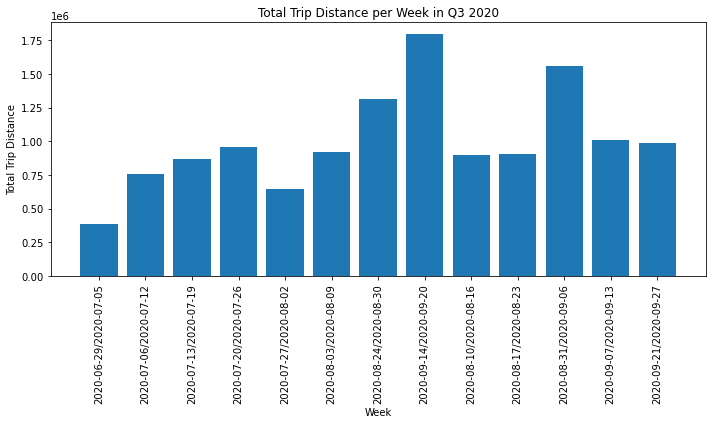

In [65]:
# Load Q3 data
df = dd.read_csv('yellow_taxi_data_Q3.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])

# Calculate the total trip distance per week
weekly_distance = df.groupby(df['tpep_pickup_datetime'].dt.to_period('W'))['trip_distance'].sum().compute()

# Filter out weeks not in Q3 of 2020
weekly_distance = weekly_distance[weekly_distance.index.quarter == 3]
weekly_distance = weekly_distance['2020']

# Convert the index to a string to fix formatting issues with matplotlib
weekly_distance.index = weekly_distance.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_distance.index, weekly_distance.values)
plt.xlabel('Week')
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance per Week in Q3 2020')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()

# total trip distance Q4

In [68]:
import dask.dataframe as dd

# Read the Q1 data back into a Dask dataframe
df_q4 = dd.read_csv('yellow_taxi_data_Q4.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q4['tpep_pickup_datetime'] = dd.to_datetime(df_q4['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q4['tpep_dropoff_datetime'] = dd.to_datetime(df_q4['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q4['week'] = df_q4['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the trip distances
weekly_trip_distance_q4 = df_q4.groupby('week')['trip_distance'].sum().compute()

# Print the total trip distance per week
print(weekly_trip_distance_q4)

week
1         556.65
40     798633.89
41    1106751.53
42    1368299.22
43    1590374.79
44    1179662.30
45    1453543.57
51    1673301.43
47    1256103.22
46    1678029.54
48    1564742.00
49    1854094.72
52    1148171.13
50    3733856.14
53     632584.12
Name: trip_distance, dtype: float64


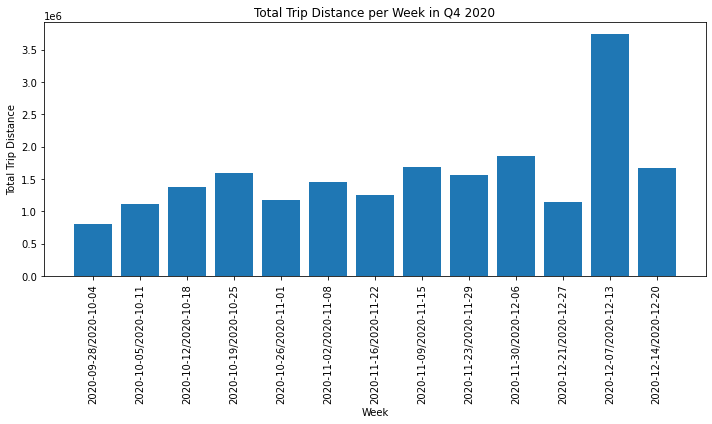

In [69]:
# Load Q4 data
df = dd.read_csv('yellow_taxi_data_Q4.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])

# Calculate the total trip distance per week
weekly_distance = df.groupby(df['tpep_pickup_datetime'].dt.to_period('W'))['trip_distance'].sum().compute()

# Filter out weeks not in Q4 of 2020
weekly_distance = weekly_distance[weekly_distance.index.quarter == 4]
weekly_distance = weekly_distance['2020']

# Convert the index to a string to fix formatting issues with matplotlib
weekly_distance.index = weekly_distance.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_distance.index, weekly_distance.values)
plt.xlabel('Week')
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance per Week in Q4 2020')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()

# total payment

# total payment Q1

In [71]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Read the Q1 data back into a Dask dataframe
df_q1 = dd.read_csv('yellow_taxi_data_Q1.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q1['tpep_pickup_datetime'] = dd.to_datetime(df_q1['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q1['tpep_dropoff_datetime'] = dd.to_datetime(df_q1['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q1['week'] = df_q1['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the real_total_amount
weekly_real_total_amount_q1 = df_q1.groupby('week')['real_total_amount'].sum().compute()

# Convert the index to a string to fix formatting issues with matplotlib
weekly_real_total_amount_q1.index = weekly_real_total_amount_q1.index.astype(str)



# Print the total trip distance per week
print(weekly_real_total_amount_q1)


week
1     14531691.07
2     24150699.24
53         107.80
5     24696168.09
3     24429076.58
8     23506366.44
12     3605344.28
4     24058472.86
7     25249987.93
10    25310704.02
13     1075394.82
6     25091378.14
9     25917501.76
11    16962508.17
14      280809.07
Name: real_total_amount, dtype: float64


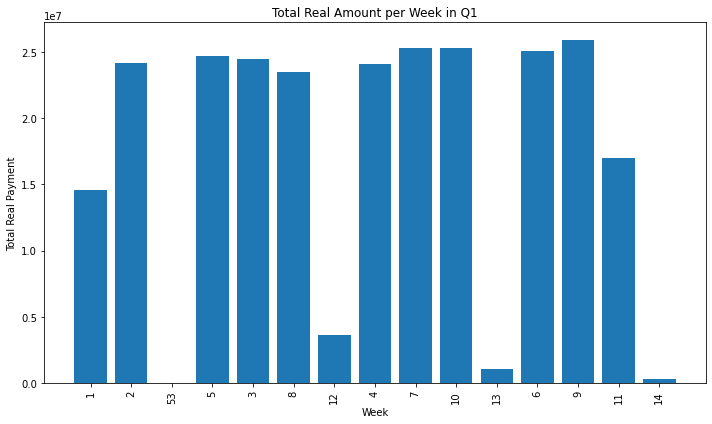

In [72]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_real_total_amount_q1.index, weekly_real_total_amount_q1.values)
plt.xlabel('Week')
plt.ylabel('Total Real Payment')
plt.title('Total Real Amount per Week in Q1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()

# total payment Q2

In [74]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Read the Q1 data back into a Dask dataframe
df_q2 = dd.read_csv('yellow_taxi_data_Q2.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q2['tpep_pickup_datetime'] = dd.to_datetime(df_q2['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q2['tpep_dropoff_datetime'] = dd.to_datetime(df_q2['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q2['week'] = df_q2['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the real_total_amount
weekly_real_total_amount_q2 = df_q2.groupby('week')['real_total_amount'].sum().compute()

# Convert the index to a string to fix formatting issues with matplotlib
weekly_real_total_amount_q2.index = weekly_real_total_amount_q2.index.astype(str)



# Print the total trip distance per week
print(weekly_real_total_amount_q2)


week
14     586876.73
15     747080.13
16     784541.47
17     817433.35
18    1039462.52
19    1725872.64
20    1493318.55
21    1313351.03
22    1387982.90
23    1700921.06
24    1909530.12
25    2237134.02
26    2657364.24
27     844520.32
Name: real_total_amount, dtype: float64


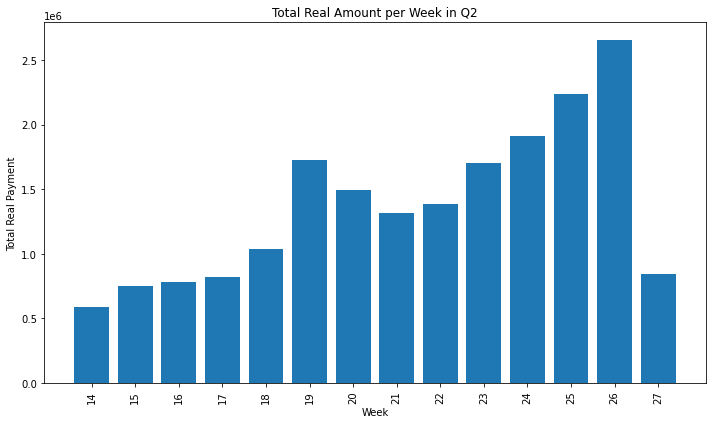

In [75]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_real_total_amount_q2.index, weekly_real_total_amount_q2.values)
plt.xlabel('Week')
plt.ylabel('Total Real Payment')
plt.title('Total Real Amount per Week in Q2')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()

# total payment Q3

In [76]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Read the Q1 data back into a Dask dataframe
df_q3 = dd.read_csv('yellow_taxi_data_Q3.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q3['tpep_pickup_datetime'] = dd.to_datetime(df_q3['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q3['tpep_dropoff_datetime'] = dd.to_datetime(df_q3['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q3['week'] = df_q3['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the real_total_amount
weekly_real_total_amount_q3 = df_q3.groupby('week')['real_total_amount'].sum().compute()

# Convert the index to a string to fix formatting issues with matplotlib
weekly_real_total_amount_q3.index = weekly_real_total_amount_q3.index.astype(str)



# Print the total trip distance per week
print(weekly_real_total_amount_q3)

week
27    1775584.47
28    2811338.90
29    3040296.41
30    3156014.55
31    3495842.45
32    3548535.38
35    4074566.35
38    5171203.46
33    3907218.01
34    3941797.94
36    4097377.03
37    4519554.92
39    5473193.09
40    2371125.38
Name: real_total_amount, dtype: float64


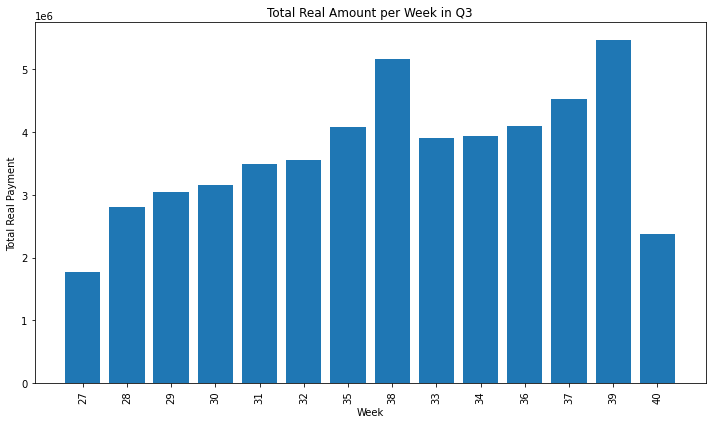

In [77]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_real_total_amount_q3.index, weekly_real_total_amount_q3.values)
plt.xlabel('Week')
plt.ylabel('Total Real Payment')
plt.title('Total Real Amount per Week in Q3')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()

# total payment Q4

In [79]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Read the Q1 data back into a Dask dataframe
df_q4 = dd.read_csv('yellow_taxi_data_Q4.csv')

# Parse 'tpep_pickup_datetime' into a datetime object
df_q4['tpep_pickup_datetime'] = dd.to_datetime(df_q4['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df_q4['tpep_dropoff_datetime'] = dd.to_datetime(df_q4['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create a new column for the week
df_q4['week'] = df_q4['tpep_pickup_datetime'].dt.isocalendar().week

# Now, group by the week number and sum the real_total_amount
weekly_real_total_amount_q4 = df_q4.groupby('week')['real_total_amount'].sum().compute()

# Convert the index to a string to fix formatting issues with matplotlib
weekly_real_total_amount_q4.index = weekly_real_total_amount_q4.index.astype(str)



# Print the total trip distance per week
print(weekly_real_total_amount_q4)

week
1        2738.69
40    3204895.10
41    6633482.13
42    5714599.17
43    5944009.78
44    6205961.57
45    5682753.83
51    4960024.35
47    5974578.39
46    5834307.83
48    4473366.89
49    5312150.64
52    4883122.26
50    5590003.71
53    2834592.85
Name: real_total_amount, dtype: float64


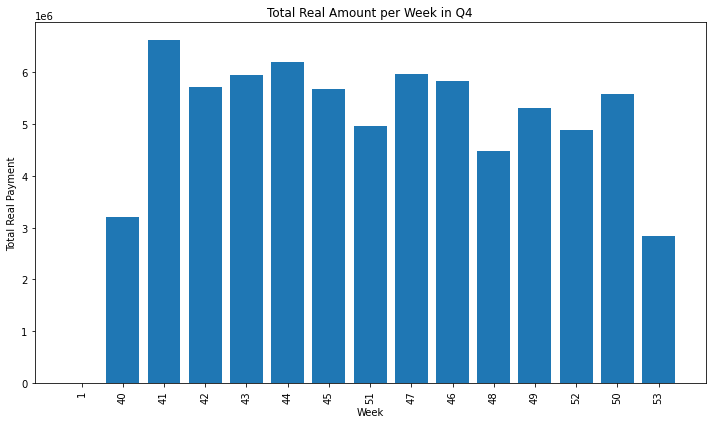

In [80]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(weekly_real_total_amount_q4.index, weekly_real_total_amount_q4.values)
plt.xlabel('Week')
plt.ylabel('Total Real Payment')
plt.title('Total Real Amount per Week in Q4')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better readability
plt.show()

# map

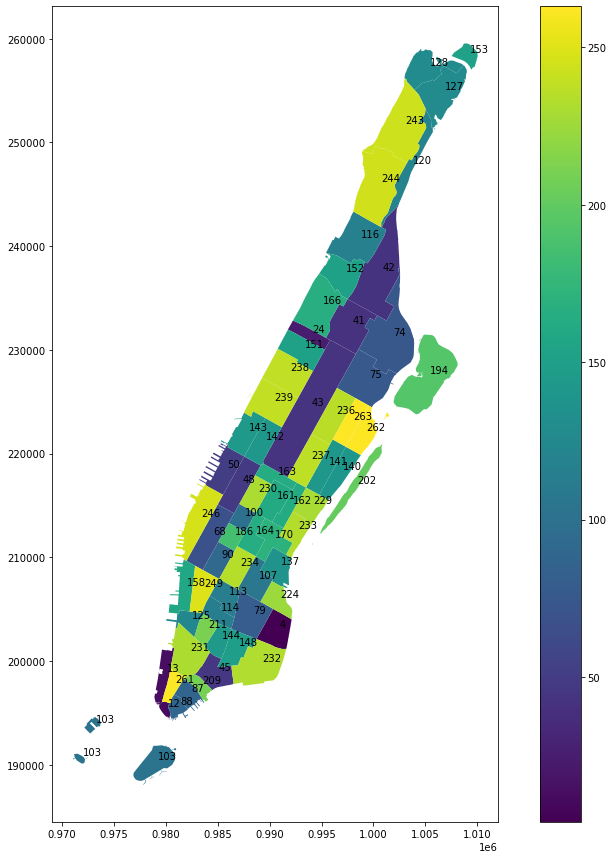

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile
nyc_taxi_zones = gpd.read_file('map_yellow/taxi_zones.shp')

# Load the ManhattanID.csv file
manhattan_ids = pd.read_csv('ManhattanID.csv')

# Filter the GeoPandas DataFrame to include only the zones in the ManhattanID.csv file
manhattan_zones = nyc_taxi_zones[nyc_taxi_zones['LocationID'].isin(manhattan_ids['LocationID'])]

# Create a figure and axis with a larger size
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the Manhattan zones
manhattan_zones.plot(column='LocationID', ax=ax, legend=True)

# Add labels to the areas
for x, y, label in zip(manhattan_zones.geometry.centroid.x, manhattan_zones.geometry.centroid.y, manhattan_zones['LocationID']):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points")

# Show the plot
plt.show()


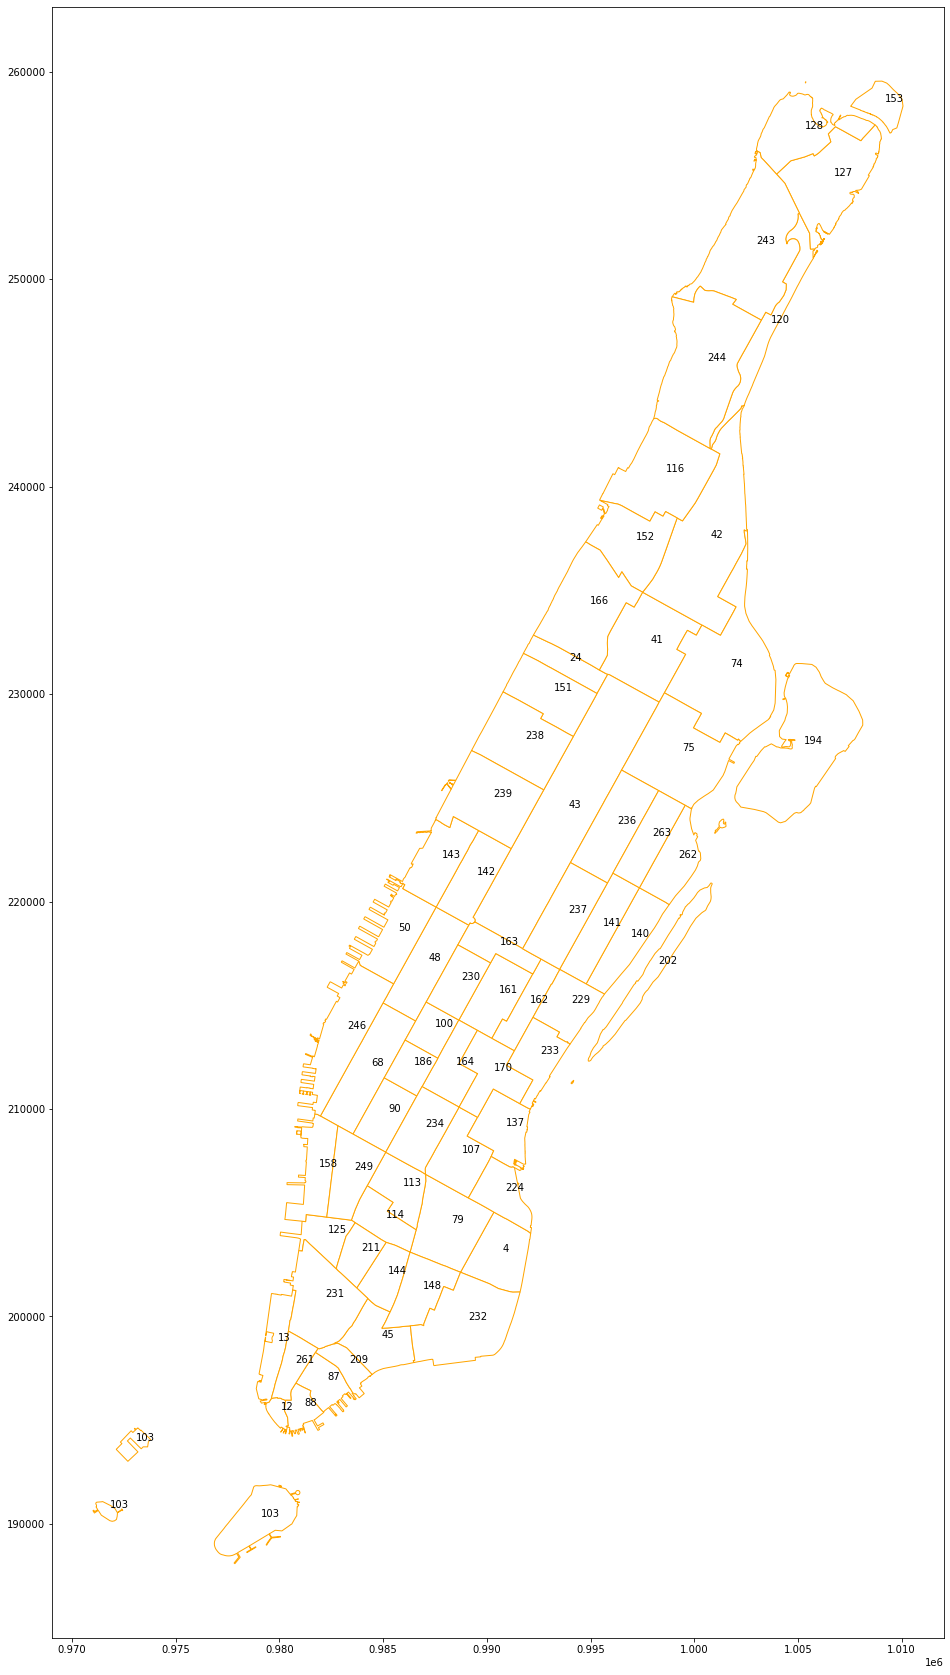

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile
nyc_taxi_zones = gpd.read_file('map_yellow/taxi_zones.shp')

# Load the ManhattanID.csv file
manhattan_ids = pd.read_csv('ManhattanID.csv')

# Filter the GeoPandas DataFrame to include only the zones in the ManhattanID.csv file
manhattan_zones = nyc_taxi_zones[nyc_taxi_zones['LocationID'].isin(manhattan_ids['LocationID'])]

# Create a figure and axis with a larger size
fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# Plot the Manhattan zones with a white background and orange boundaries
manhattan_zones.plot(color='white', edgecolor='orange', ax=ax)

# Add labels to the areas
for x, y, label in zip(manhattan_zones.geometry.centroid.x, manhattan_zones.geometry.centroid.y, manhattan_zones['LocationID']):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points")

# Show the plot
plt.show()


In [ ]:


# Load the ManhattanID.csv file
manhattan_ids = pd.read_csv('ManhattanID.csv')

# Load the yellow_taxi_data.csv file
taxi_data = pd.read_csv('yellow_taxi_data.csv')

# Filter the taxi data to include only the trips that both started and ended in Manhattan
manhattan_taxi_data = taxi_data[taxi_data['PULocationID'].isin(manhattan_ids['LocationID']) & taxi_data['DOLocationID'].isin(manhattan_ids['LocationID'])]

# Save the resulting DataFrame to a new CSV file
manhattan_taxi_data.to_csv('Manhattan_yellowtaxi.csv', index=False)


In [3]:
import dask.dataframe as dd

# Read from a csv file into a dask dataframe
df = dd.read_csv('Manhattan_yellowtaxi.csv')

# Check how many rows and columns this dataframe has
print("number of rows:", len(df.index.compute()))
print("number of columns:", len(df.columns))

number of rows: 2171320
number of columns: 7


In [4]:


# Load the Manhattan_yellowtaxi.csv file
manhattan_taxi_data = pd.read_csv('Manhattan_yellowtaxi.csv')

# Count the number of occurrences of each unique value in the PULocationID and DOLocationID columns
pu_counts = manhattan_taxi_data['PULocationID'].value_counts()
do_counts = manhattan_taxi_data['DOLocationID'].value_counts()

# Convert the Series to DataFrames and reset the index
pu_counts = pu_counts.reset_index().rename(columns={'index': 'PULocationID', 'PULocationID': 'PU_Counts'})
do_counts = do_counts.reset_index().rename(columns={'index': 'DOLocationID', 'DOLocationID': 'DO_Counts'})

# Merge the two DataFrames on the location ID
counts = pd.merge(pu_counts, do_counts, left_on='PULocationID', right_on='DOLocationID')

# Print the resulting DataFrame
print(counts)


    PULocationID  PU_Counts  DOLocationID  DO_Counts
0            237     108633           237      99199
1            236     102615           236     110320
2            161      97202           161      92515
3            186      85403           186      61117
4            230      82089           230      73217
..           ...        ...           ...        ...
61           194        158           194        186
62           202         55           202        868
63           153         16           153        109
64           128         12           128        136
65           120          7           120         80

[66 rows x 4 columns]


In [5]:
# Save the counts DataFrame to a new CSV file
counts.to_csv('yellowID_counts.csv', index=False)


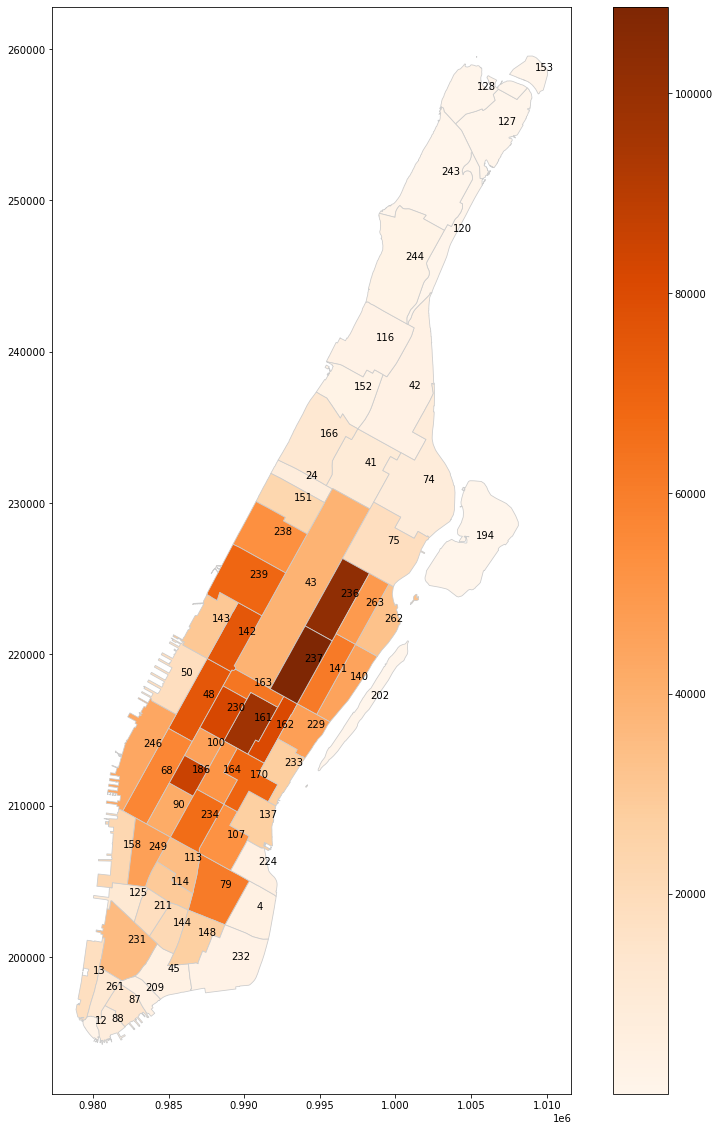

Top 10 PULocationID values:
              PU_Counts                          Zone
PULocationID                                         
237              108633         Upper East Side South
236              102615         Upper East Side North
161               97202                Midtown Center
186               85403  Penn Station/Madison Sq West
230               82089     Times Sq/Theatre District
162               80745                  Midtown East
48                75376                  Clinton East
142               75229           Lincoln Square East
170               69957                   Murray Hill
239               69104         Upper West Side South

Top 10 DOLocationID values:
              DO_Counts                       Zone
DOLocationID                                      
236              110320      Upper East Side North
237               99199      Upper East Side South
161               92515             Midtown Center
170               73329                M

In [6]:

# Load the shapefile
nyc_taxi_zones = gpd.read_file('map_yellow/taxi_zones.shp')

# Load the counts data
counts = pd.read_csv('yellowID_counts.csv')

# Load the ManhattanID.csv file
manhattan_ids = pd.read_csv('ManhattanID.csv')

# Filter the nyc_taxi_zones DataFrame to include only the zones in Manhattan
nyc_taxi_zones = nyc_taxi_zones[nyc_taxi_zones['LocationID'].isin(manhattan_ids['LocationID'])]

# Merge the geospatial data with the counts data
merged = nyc_taxi_zones.set_index('LocationID').join(counts.set_index('PULocationID'))

# Create a figure and axis with a larger size
fig, ax = plt.subplots(1, 1, figsize=(15, 20))

# Plot the data
merged.plot(column='PU_Counts', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels to the areas
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points")

# Show the plot
plt.show()

# Get the top 10 PULocationID values
top_10_pu = counts[['PULocationID', 'PU_Counts']].sort_values('PU_Counts', ascending=False).head(10)

# Get the top 10 DOLocationID values
top_10_do = counts[['DOLocationID', 'DO_Counts']].sort_values('DO_Counts', ascending=False).head(10)

# Merge the top 10 PULocationID values with the manhattan_ids data to get the zone names
top_10_pu = top_10_pu.set_index('PULocationID').join(manhattan_ids[['LocationID', 'Zone']].set_index('LocationID'))

# Merge the top 10 DOLocationID values with the manhattan_ids data to get the zone names
top_10_do = top_10_do.set_index('DOLocationID').join(manhattan_ids[['LocationID', 'Zone']].set_index('LocationID'))

# Print the top 10 PULocationID and DOLocationID values
print("Top 10 PULocationID values:")
print(top_10_pu)
print("\nTop 10 DOLocationID values:")
print(top_10_do)



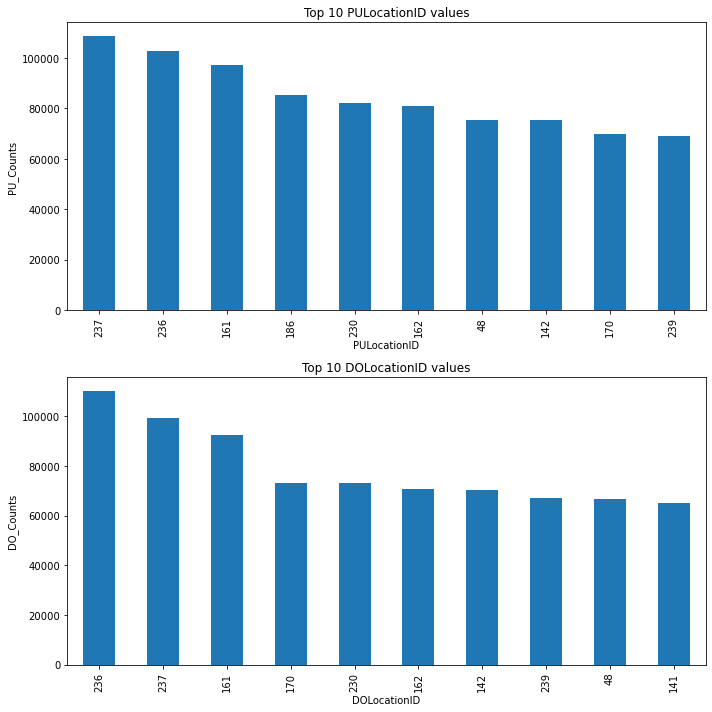

In [7]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the top 10 PULocationID values
top_10_pu['PU_Counts'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Top 10 PULocationID values')
axs[0].set_xlabel('PULocationID')
axs[0].set_ylabel('PU_Counts')

# Plot the top 10 DOLocationID values
top_10_do['DO_Counts'].plot(kind='bar', ax=axs[1])
axs[1].set_title('Top 10 DOLocationID values')
axs[1].set_xlabel('DOLocationID')
axs[1].set_ylabel('DO_Counts')

# Show the plot
plt.tight_layout()
plt.show()


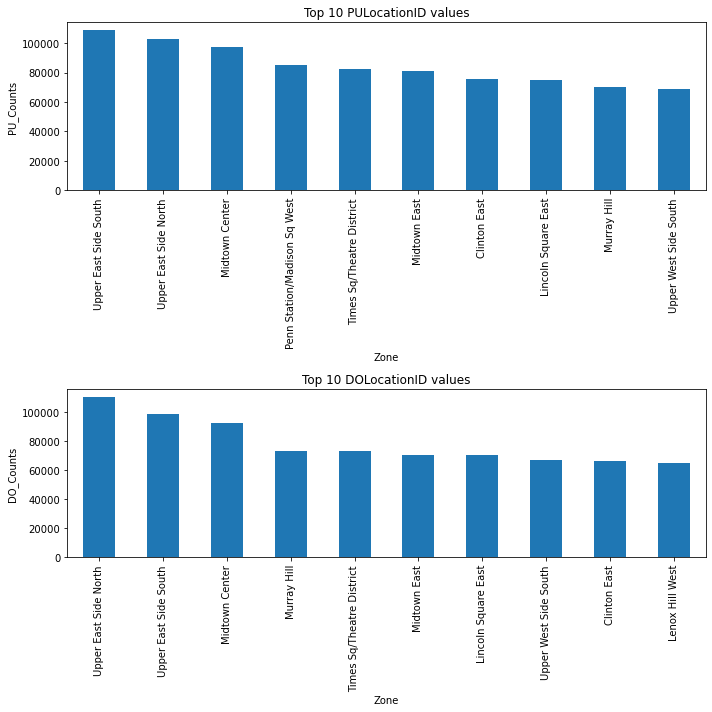

In [8]:
import matplotlib.pyplot as plt

# Set the index to the 'Zone' column
top_10_pu = top_10_pu.set_index('Zone')
top_10_do = top_10_do.set_index('Zone')

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the top 10 PULocationID values
top_10_pu['PU_Counts'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Top 10 PULocationID values')
axs[0].set_xlabel('Zone')
axs[0].set_ylabel('PU_Counts')

# Plot the top 10 DOLocationID values
top_10_do['DO_Counts'].plot(kind='bar', ax=axs[1])
axs[1].set_title('Top 10 DOLocationID values')
axs[1].set_xlabel('Zone')
axs[1].set_ylabel('DO_Counts')

# Show the plot
plt.tight_layout()
plt.show()
